# Gold Price Prediction 

__Model: Random Forest Regressor__

__Importing the Libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df=pd.read_csv('/Users/amit/Documents/Data Science/Machine Lerning and Data science/ML Projects/Gold Price Prediction/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
df.isnull().sum()  # to check the null values in the data 

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [5]:
df.shape

(2290, 6)

__Correlation of the Variables__

In [6]:
correlation=df.corr()

<AxesSubplot:>

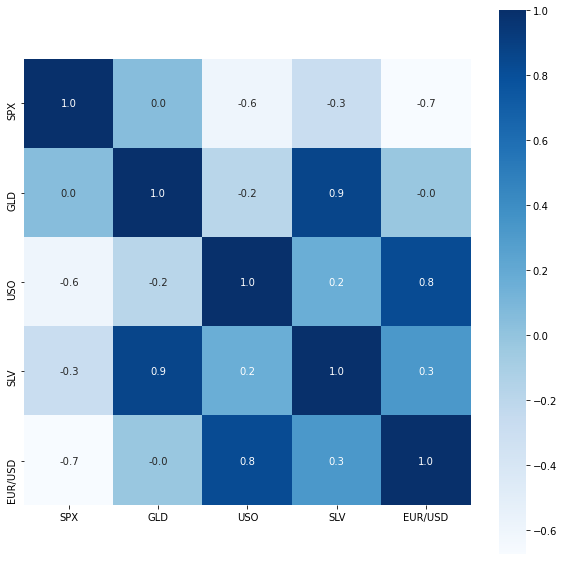

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

In [8]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

From this above heat map and the correlation we can analyze the different insights of the data

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

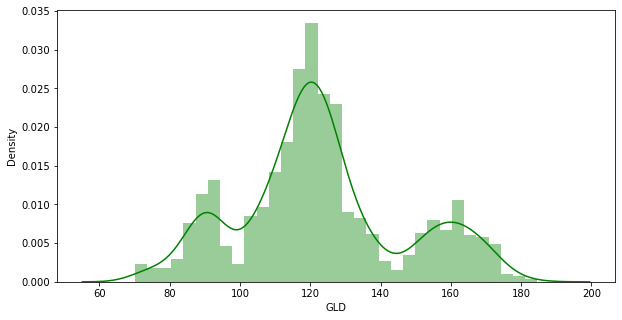

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(df['GLD'],color='Green')
# To check the distribution of the gold prices

In [10]:
df=df.sample(frac=1).reset_index(drop=True)  # shuffling of the rows in the data

In [11]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,8/2/2017,2477.570068,120.400002,10.140000,15.670000,1.185115
1,5/7/2015,2088.000000,113.419998,20.200001,15.600000,1.124695
2,11/19/2010,1199.729980,132.199997,35.220001,26.740000,1.365728
3,6/11/2012,1308.930054,155.360001,30.700001,27.790001,1.247816
4,1/4/2017,2270.750000,110.860001,11.580000,15.580000,1.041992


In [12]:
feature_values=df.drop(['GLD','Date'],axis=1)
feature_values.head()

,SPX,USO,SLV,EUR/USD
0,2477.570068,10.140000,15.670000,1.185115
1,2088.000000,20.200001,15.600000,1.124695
2,1199.729980,35.220001,26.740000,1.365728
3,1308.930054,30.700001,27.790001,1.247816
4,2270.750000,11.580000,15.580000,1.041992


In [13]:
target_values=df['GLD']
target_values

0       120.400002
1       113.419998
2       132.199997
3       155.360001
4       110.860001
           ...    
2285    112.300003
2286    108.940002
2287    118.080002
2288    120.730003
2289    128.029999
Name: GLD, Length: 2290, dtype: float64

__Train/Test split__

In [14]:
X_train,X_test,y_train,y_test=train_test_split(feature_values,target_values,test_size=0.1,random_state=2)

## Model : Random Forest Regressor

In [15]:
model_random=RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

In [16]:
predict=model_random.predict(X_test)
predict

array([121.41249914, 173.38439821, 124.54510136, 112.33109962,
       173.19809892, 152.77409813, 127.64390037,  87.42469862,
       113.54399971, 129.67370088,  98.12859958, 108.61589895,
       124.4357001 , 119.12270078, 119.96179929, 156.27440229,
       121.42570166, 121.74289858, 162.68140049, 117.5514008 ,
       125.02950066, 115.99340149, 126.65350113, 130.88489988,
        91.24409896, 135.0689983 , 104.73189902, 159.14039945,
       125.79340003, 154.0625976 , 127.1712987 , 119.8529999 ,
        93.96610055, 124.09600151,  92.70319837, 164.18130025,
       149.95120053, 104.06719968, 122.56969878,  85.13389958,
        88.75360049, 116.69209999, 168.91700064, 122.01819913,
       120.14689953,  96.51880101, 116.20769923,  90.00200044,
       118.60610116, 112.65020065, 140.46769866, 125.20519981,
       103.93679989, 127.22200113, 122.30319909, 157.2958019 ,
       113.33200056,  87.17339898, 167.67859912,  94.86110188,
       119.19369926, 154.7206    , 102.68179892, 110.10

__Evaluating the Model__

In [17]:
score_r2=metrics.r2_score(y_test,predict)
score_r2

0.990523875199908

__From this we can analyze that the ' Predicted Price ' is very close to the ' Actual Price ' of the gold__

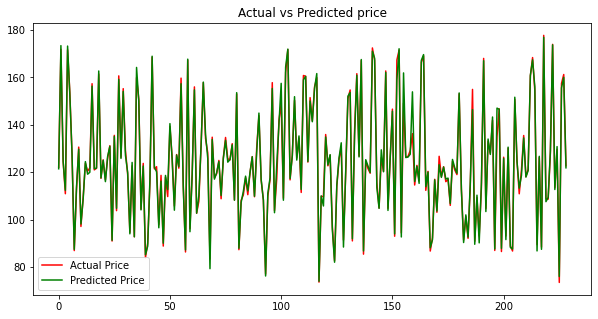

In [18]:
y_test=list(y_test)
plt.figure(figsize=(10,5))
plt.plot(y_test,color='red',label='Actual Price')
plt.plot(predict,color='green',label='Predicted Price')
plt.legend()
plt.title('Actual vs Predicted price')
plt.show()